##### Nigel K. Gondo: Data Warrior Analytics

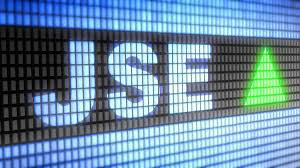

In [74]:
from PIL import Image
Image.open('jse.jpg')

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Brief-description-of-the-project" data-toc-modified-id="Brief-description-of-the-project-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Brief description of the project</a></span></li><li><span><a href="#Brief-description-of-the-companies" data-toc-modified-id="Brief-description-of-the-companies-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Brief description of the companies</a></span></li><li><span><a href="#Importing-the-relevant-libraries" data-toc-modified-id="Importing-the-relevant-libraries-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Importing the relevant libraries</a></span></li><li><span><a href="#Importing-stock-price-data-using-yahoo-finance-API" data-toc-modified-id="Importing-stock-price-data-using-yahoo-finance-API-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Importing stock price data using yahoo finance API</a></span></li><li><span><a href="#Stock-prices-time-series" data-toc-modified-id="Stock-prices-time-series-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Stock prices time series</a></span></li><li><span><a href="#Summary-statistics" data-toc-modified-id="Summary-statistics-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Summary statistics</a></span></li><li><span><a href="#Calculating-daily-returns,-mean,-variance-and-drift" data-toc-modified-id="Calculating-daily-returns,-mean,-variance-and-drift-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Calculating daily returns, mean, variance and drift</a></span></li><li><span><a href="#Creating-variable-of-price-list-for-each-stock" data-toc-modified-id="Creating-variable-of-price-list-for-each-stock-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Creating variable of price list for each stock</a></span></li><li><span><a href="#Creating-loops-to-run-through-the-simulations" data-toc-modified-id="Creating-loops-to-run-through-the-simulations-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>Creating loops to run through the simulations</a></span></li><li><span><a href="#Averaging-the-prices" data-toc-modified-id="Averaging-the-prices-10"><span class="toc-item-num">10&nbsp;&nbsp;</span>Averaging the prices</a></span></li></ul></div>

# Brief description of the project

The aim of this project was about predicting the stock prices of six top companies on the JSE using Monte Carlo Simulation. I chose companies in different industries ranging from internet services, telecommunications, retail, banking, and mining; the companies in question are Naspers, MTN, Richemont, Massmart, ABSA, and Anglo America. Monte Carlo Simulation was the method of choice for the prediction. I predicted 250 days and a thousand simulations for each stock. I obtained the data using the Yahoo Finance API.

Monte Carlo Simulation models probabilities of different outcomes, simply put in this case it runs a multitude of trials with different random numbers generated from an underlying distribution for the uncertain variables.

# Brief description of the companies


**Nasper (NPN.JO)** - is a holding company for a group of companies which operate in the electronic and print media industries. The Group provides television subscription and internet services and publishes newspapers, magazines and books.

**MTN (MTN.JO)** - is a multinational telecommunications group, operating in countries in Africa and the Middle East..

**COMPAGNIE FINANCIERE RICHEMONT SA (CFR.JO)** - Richemont is the owner of prestigious Maisons, recognised for their excellence in jewellery, watches, fashion and accessories, and distinguished by their craftsmanship and creativity.


**Massmart (MSM.JO)** - distributes and retails general merchandise, food, and liquors to customers in southern Africa. The Group operates through five separate chains: Game, Dion, Makro, Shield, and CCW.


**ABSA (ABSP.JO)** - is the holding company of a banking and financial services group. The Group provides a range of retail and corporate banking, insurance, financial and property services through local and international networks.

**Anglo America (AGL.JO)** - is a global mining company. The Company’s mining portfolio includes bulk commodities including iron ore, manganese and metallurgical coal, base metals including copper and nickel and precious metals and minerals including platinum and diamonds.


# Importing the relevant libraries

In [1]:
import pandas as pd
from pandas_datareader import data as wb
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use('fivethirtyeight')
plt.rcParams.update({'figure.figsize':(10,8), 'figure.dpi':100})
sns.set()
sns.set_style('white')
pd.options.display.float_format = '{:,.2f}'.format
np.set_printoptions(formatter={'float_kind':'{:f}'.format})

# Importing stock price data using yahoo finance API

In [30]:
#Creating a list of the ticker of the companies to extract data from yahoo finance
# Stock price data is from 2012-10-05 to 2022-10-05 - Ten year period
ticker = ['NPN.JO', 'MTN.JO', 'CFR.JO', 
          'MSM.JO', 'ABSP.JO', 'AGL.JO']

#Creating and empty Data Frame for the data to be imported
finance_data = pd.DataFrame()

finance_data[ticker] = wb.DataReader(ticker, 
                                     data_source = 'yahoo', 
                                     start = '2012-10-5')['Adj Close'] #Will be using the adjust close price

In [117]:
#Viewing the top 5 and last 5 rows of the data
print(finance_data.head())
print('__________________________________________________________________')
print(finance_data.tail())

              NPN.JO   MTN.JO   CFR.JO    MSM.JO   ABSP.JO    AGL.JO
Date                                                                
2012-10-05 32,435.48 9,566.20 4,498.61 14,281.03 38,323.97 17,830.51
2012-10-08 32,374.91 9,204.35 4,495.32 13,883.70 38,196.37 17,996.87
2012-10-09 32,102.95 9,190.41 4,419.58 14,148.02 38,198.07 17,987.74
2012-10-10 32,450.02 9,409.82 4,400.65 14,233.59 38,201.50 18,057.23
2012-10-11 32,012.69 9,637.11 4,597.39 14,169.20 38,219.41 18,242.54
__________________________________________________________________
               NPN.JO    MTN.JO    CFR.JO   MSM.JO   ABSP.JO    AGL.JO
Date                                                                  
2022-09-29 219,153.23 11,941.00 17,082.00 6,025.00 96,500.00 54,774.00
2022-09-30 225,693.83 11,988.00 17,115.00 6,039.00 96,790.00 54,600.00
2022-10-03 226,462.66 12,000.00 17,166.00 6,035.00 96,600.00 56,445.00
2022-10-04 234,599.77 12,331.00 18,105.00 6,050.00 96,000.00 58,386.00
2022-10-05 235,010.00 12

In [118]:
#Creating seperate data frames of the companies
Nasper = pd.DataFrame(finance_data['NPN.JO'])
MTN = pd.DataFrame(finance_data['MTN.JO'])
Richemont = pd.DataFrame(finance_data['CFR.JO'])
Massmart = pd.DataFrame(finance_data['MSM.JO'])
ABSA = pd.DataFrame(finance_data['ABSP.JO'])
Anglo_America = pd.DataFrame(finance_data['AGL.JO'])

# Stock prices time series

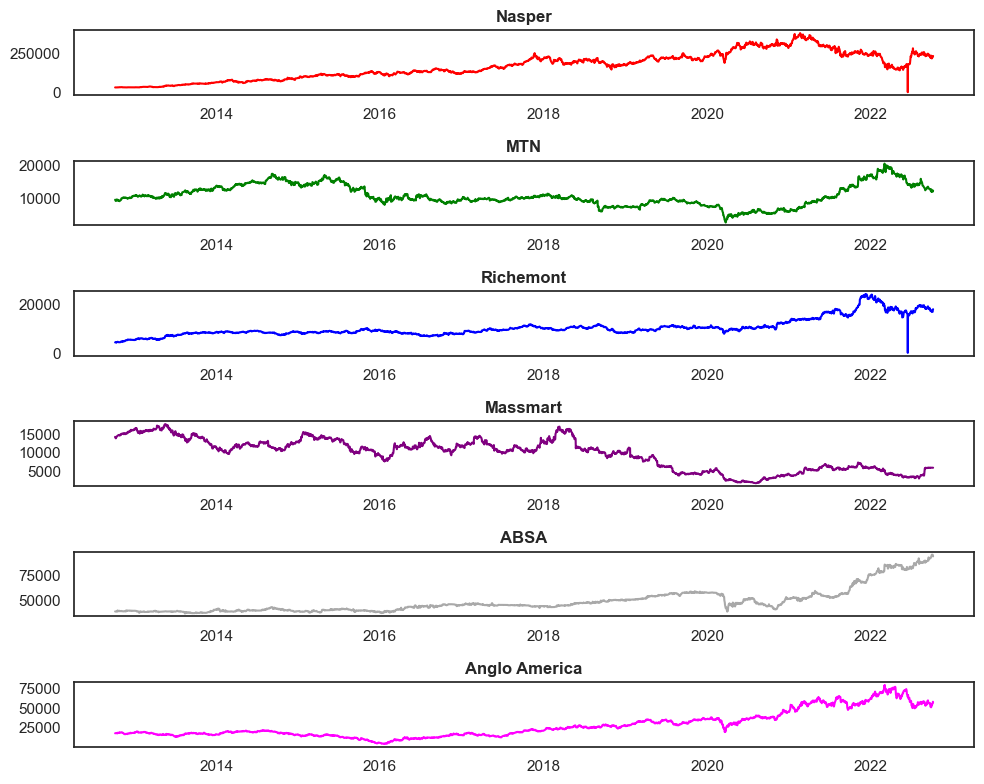

In [119]:
#Time series of the six companies stock prices
pd.to_datetime(Nasper.index)
pd.to_datetime(MTN.index)
pd.to_datetime(Richemont.index)
pd.to_datetime(Massmart.index)
pd.to_datetime(ABSA.index)
pd.to_datetime(Anglo_America.index)

fig,ax = plt.subplots(6)

#Nasper time  series
ax[0].plot(Nasper.index, 
           Nasper['NPN.JO'],
           color = 'red')

ax[0].set_title('Nasper', 
                fontweight = 'bold')

#MTN time  series
ax[1].plot(MTN.index, 
           MTN['MTN.JO'], 
           color = 'green')

ax[1].set_title('MTN', 
                fontweight = 'bold')

#Richemont time  series
ax[2].plot(Richemont.index, 
           Richemont['CFR.JO'], 
           color = 'blue')

ax[2].set_title('Richemont', 
                fontweight = 'bold')

#Massmart time  series
ax[3].plot(Massmart.index, 
           Massmart['MSM.JO'], 
           color = 'purple')

ax[3].set_title('Massmart', 
                fontweight = 'bold')

#ABSA time  series
ax[4].plot(ABSA.index, 
           ABSA['ABSP.JO'], 
           color = 'darkgrey')

ax[4].set_title('ABSA', 
                fontweight = 'bold')

#Anglo America time  series
ax[5].plot(Anglo_America.index, 
           Anglo_America['AGL.JO'], 
           color = 'magenta')

ax[5].set_title('Anglo America', 
                fontweight = 'bold')

plt.tight_layout()

plt.show()

# Summary statistics

In [120]:
print(Nasper.describe())
print('_______________')
print(MTN.describe())
print('_______________')
print(Richemont.describe())
print('_______________')
print(Massmart.describe())
print('_______________')
print(ABSA.describe())
print('_______________')
print(Anglo_America.describe())

          NPN.JO
count   2,554.00
mean  168,460.43
std    85,161.39
min     1,735.12
25%   103,817.67
50%   165,691.39
75%   229,393.23
max   381,380.53
_______________
         MTN.JO
count  2,554.00
mean  10,853.46
std    3,176.51
min    2,689.26
25%    8,989.57
50%   10,191.34
75%   13,192.92
max   20,484.49
_______________
         CFR.JO
count  2,554.00
mean  10,577.47
std    3,713.19
min      158.52
25%    8,480.81
50%    9,542.51
75%   11,003.54
max   24,541.81
_______________
         MSM.JO
count  2,554.00
mean   9,748.40
std    4,075.42
min    1,916.00
25%    5,909.50
50%   10,715.59
75%   12,744.41
max   17,628.59
_______________
        ABSP.JO
count  2,554.00
mean  48,453.00
std   12,634.02
min   36,181.33
25%   39,276.87
50%   44,659.05
75%   52,261.40
max   96,790.00
_______________
         AGL.JO
count  2,554.00
mean  27,877.02
std   16,897.82
min    4,243.02
25%   15,926.97
50%   20,768.22
75%   35,374.49
max   79,992.80


# Calculating daily returns, mean, variance and drift

In [121]:
#Creating variables for the statistics to be use
#Calculating returns of the stocks
log_returns_npn = np.log(1 + Nasper.pct_change())
log_returns_mtn = np.log(1 + MTN.pct_change())
log_returns_cfr = np.log(1 + Richemont.pct_change())
log_returns_msm = np.log(1 + Massmart.pct_change())
log_returns_absa = np.log(1 + ABSA.pct_change())
log_returns_agl = np.log(1 + Anglo_America.pct_change())

#Calculating the mean of the returns
mean_npn = log_returns_npn.mean()
mean_mtn = log_returns_mtn.mean()
mean_cfr = log_returns_cfr.mean()
mean_msm = log_returns_msm.mean()
mean_absa = log_returns_absa.mean()
mean_agl = log_returns_agl.mean()

#Calculating variance of the returns
var_npn = log_returns_npn.var()
var_mtn = log_returns_mtn.var()
var_cfr = log_returns_cfr.var()
var_msm = log_returns_msm.var()
var_absa = log_returns_absa.var()
var_agl = log_returns_agl.var()

#Calculating drift
drift_npn = mean_npn - (0.5 *var_npn)
drift_mtn = mean_mtn - (0.5 *var_mtn)
drift_cfr = mean_cfr - (0.5 *var_cfr)
drift_msm = mean_msm - (0.5 *var_msm)
drift_absa = mean_absa - (0.5 *var_absa)
drift_agl = mean_agl - (0.5 *var_agl)

#Calculating the standard deviation of the returns
stdev_npn = log_returns_npn.std()
stdev_mtn = log_returns_mtn.std()
stdev_cfr = log_returns_cfr.std()
stdev_msm = log_returns_msm.std()
stdev_absa = log_returns_absa.std()
stdev_agl = log_returns_agl.std()


#Determing the number of intervals and iterations
t_intervals = 250 #predicting 250 days
n_iterations = 1000 # a 1000 simulations to be run

daily_returns_npn = np.exp(drift_npn.values + stdev_npn.values *\
                           norm.ppf(np.random.rand(t_intervals, n_iterations)))

daily_returns_mtn = np.exp(drift_mtn.values + stdev_mtn.values *\
                           norm.ppf(np.random.rand(t_intervals, n_iterations)))

daily_returns_cfr = np.exp(drift_cfr.values + stdev_cfr.values *\
                           norm.ppf(np.random.rand(t_intervals, n_iterations)))

daily_returns_msm = np.exp(drift_msm.values + stdev_msm.values *\
                           norm.ppf(np.random.rand(t_intervals, n_iterations)))

daily_returns_absa = np.exp(drift_absa.values + stdev_absa.values *\
                            norm.ppf(np.random.rand(t_intervals, n_iterations)))

daily_returns_agl = np.exp(drift_agl.values + stdev_agl.values *\
                           norm.ppf(np.random.rand(t_intervals, n_iterations)))

In [122]:
#Creating variables for the last adjusted prices for each stock
p_npn = Nasper.iloc[-1]
p_mtn = MTN.iloc[-1]
p_cfr = Richemont.iloc[-1]
p_msm = Massmart.iloc[-1]
p_absa = ABSA.iloc[-1]
p_agl = Anglo_America.iloc[-1]

print(p_npn)
print(p_mtn)
print(p_cfr)
print(p_msm)
print(p_absa)
print(p_agl)


NPN.JO   235,010.00
Name: 2022-10-05 00:00:00, dtype: float64
MTN.JO   12,330.00
Name: 2022-10-05 00:00:00, dtype: float64
CFR.JO   18,212.00
Name: 2022-10-05 00:00:00, dtype: float64
MSM.JO   6,041.00
Name: 2022-10-05 00:00:00, dtype: float64
ABSP.JO   95,000.00
Name: 2022-10-05 00:00:00, dtype: float64
AGL.JO   57,702.00
Name: 2022-10-05 00:00:00, dtype: float64


# Creating variable of price list for each stock

In [123]:
price_list_npn = np.zeros_like(daily_returns_npn)
price_list_mtn = np.zeros_like(daily_returns_mtn)
price_list_cfr = np.zeros_like(daily_returns_cfr)
price_list_msm = np.zeros_like(daily_returns_msm)
price_list_absa = np.zeros_like(daily_returns_absa)
price_list_agl = np.zeros_like(daily_returns_agl)

In [124]:
print(price_list_npn)

[[0.000000 0.000000 0.000000 ... 0.000000 0.000000 0.000000]
 [0.000000 0.000000 0.000000 ... 0.000000 0.000000 0.000000]
 [0.000000 0.000000 0.000000 ... 0.000000 0.000000 0.000000]
 ...
 [0.000000 0.000000 0.000000 ... 0.000000 0.000000 0.000000]
 [0.000000 0.000000 0.000000 ... 0.000000 0.000000 0.000000]
 [0.000000 0.000000 0.000000 ... 0.000000 0.000000 0.000000]]


In [125]:
#Now the first row will be set with the lastest price
price_list_npn[0] = p_npn
price_list_mtn[0] = p_mtn
price_list_cfr[0] = p_cfr
price_list_msm[0] = p_msm
price_list_absa[0] = p_absa
price_list_agl[0] = p_agl

In [126]:
print(price_list_npn)
print('_______________')
print(price_list_mtn)
print('_______________')
print(price_list_cfr)
print('_______________')
print(price_list_msm)
print('_______________')
print(price_list_absa)
print('_______________')
print(price_list_agl)

[[235010.000000 235010.000000 235010.000000 ... 235010.000000
  235010.000000 235010.000000]
 [0.000000 0.000000 0.000000 ... 0.000000 0.000000 0.000000]
 [0.000000 0.000000 0.000000 ... 0.000000 0.000000 0.000000]
 ...
 [0.000000 0.000000 0.000000 ... 0.000000 0.000000 0.000000]
 [0.000000 0.000000 0.000000 ... 0.000000 0.000000 0.000000]
 [0.000000 0.000000 0.000000 ... 0.000000 0.000000 0.000000]]
_______________
[[12330.000000 12330.000000 12330.000000 ... 12330.000000 12330.000000
  12330.000000]
 [0.000000 0.000000 0.000000 ... 0.000000 0.000000 0.000000]
 [0.000000 0.000000 0.000000 ... 0.000000 0.000000 0.000000]
 ...
 [0.000000 0.000000 0.000000 ... 0.000000 0.000000 0.000000]
 [0.000000 0.000000 0.000000 ... 0.000000 0.000000 0.000000]
 [0.000000 0.000000 0.000000 ... 0.000000 0.000000 0.000000]]
_______________
[[18212.000000 18212.000000 18212.000000 ... 18212.000000 18212.000000
  18212.000000]
 [0.000000 0.000000 0.000000 ... 0.000000 0.000000 0.000000]
 [0.000000 0.00000

# Creating loops to run through the simulations

In [127]:
#Iterating for Naspers
for t in range(1, t_intervals):
    price_list_npn[t] = price_list_npn[t-1] * daily_returns_npn[t]
    
print(price_list_npn[:3])
print('__________________________________________________________________')
print(price_list_npn[-3:])

[[235010.000000 235010.000000 235010.000000 ... 235010.000000
  235010.000000 235010.000000]
 [201347.781739 217011.043432 205723.112833 ... 279263.289474
  235079.950622 298221.139636]
 [232922.232955 238147.498057 224101.478584 ... 241970.338072
  248910.795900 306384.118866]]
__________________________________________________________________
[[395598.649483 620793.098909 541035.033812 ... 22642.308655
  489345.529322 122385.183329]
 [442153.576704 700346.841679 543338.687797 ... 22804.635771
  358794.223877 106233.727608]
 [372991.656970 715821.207631 676213.339395 ... 21075.579844
  292593.003396 86566.414862]]


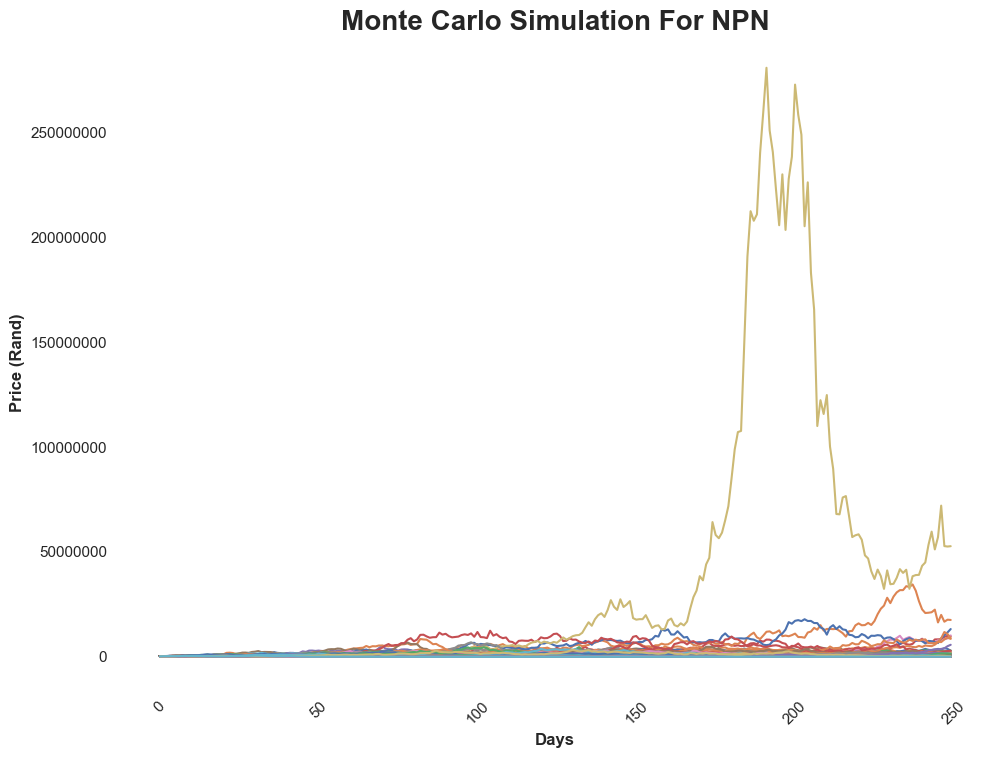

In [128]:
#Creating a function for the time series chart
def monte_simulation(price_list, title):
    fig, ax =  plt.subplots()
    
    ax.plot(price_list)
    
    plt.title(title, 
              fontsize = 20, 
              fontweight = 'bold')
    
    plt.ylabel('Price (Rand)', 
               fontweight = 'bold')
    
    plt.xlabel('Days', 
               fontweight = 'bold')
    
    plt.xticks(rotation = 45)
    
    ax.set_frame_on(False)
    
    ax.ticklabel_format(useOffset=False, 
                        style='plain')
    
    plt.show()
  

#Nasper Monte Carlo Simulation
monte_simulation(price_list_npn, 'Monte Carlo Simulation For NPN')

In [129]:
#Iterating for MTN
for t in range(1, t_intervals):
    price_list_mtn[t] = price_list_mtn[t-1] * daily_returns_mtn[t]
    
print(price_list_mtn[:3])
print('__________________________________________________________________')
print(price_list_mtn[-3:])

[[12330.000000 12330.000000 12330.000000 ... 12330.000000 12330.000000
  12330.000000]
 [12275.027113 11689.801223 12215.997153 ... 12549.931298 12428.447579
  12350.322519]
 [12062.914780 11971.848710 11617.779205 ... 12241.368239 12633.279454
  12069.342672]]
__________________________________________________________________
[[11374.217077 17088.546247 6804.615579 ... 7532.099644 10571.252870
  13251.978674]
 [11525.714939 16594.240617 6831.348934 ... 7749.414801 10719.925234
  12853.206076]
 [10994.425630 16674.476789 6998.021621 ... 7502.825582 10693.527247
  12970.441242]]


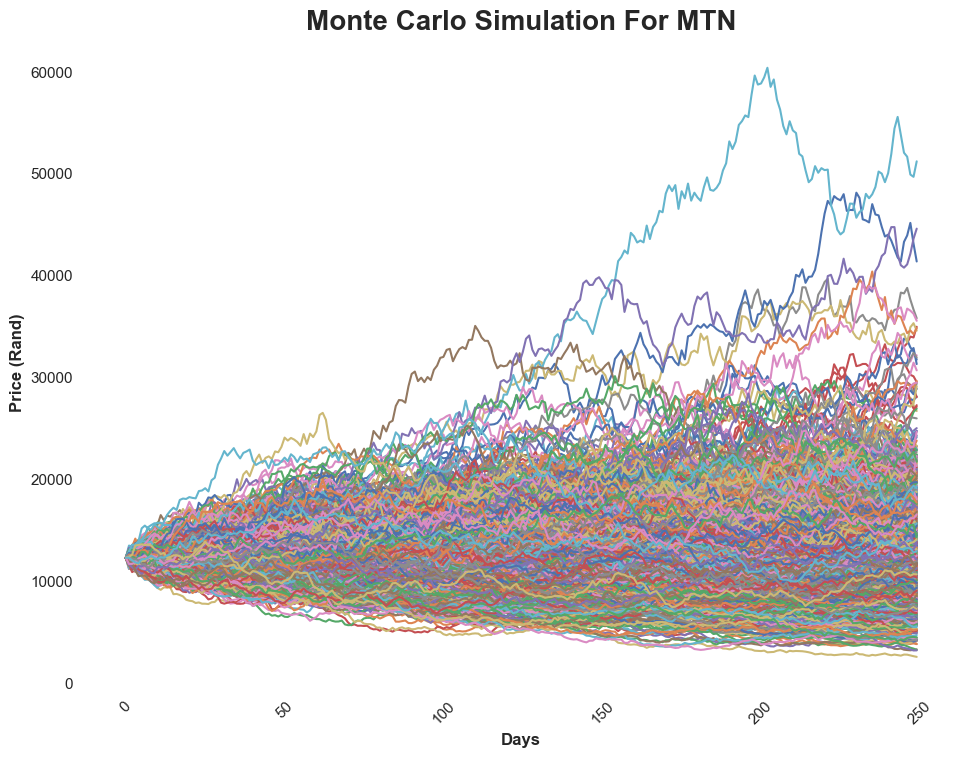

In [130]:
#MTN monte carlo simulation
monte_simulation(price_list_mtn, 
                 'Monte Carlo Simulation For MTN')

In [131]:
#Iterating for CFR
for t in range(1, t_intervals):
    price_list_cfr[t] = price_list_cfr[t-1] * daily_returns_cfr[t]
    
print(price_list_cfr[:3])
print('__________________________________________________________________')
print(price_list_cfr[-3:])

[[18212.000000 18212.000000 18212.000000 ... 18212.000000 18212.000000
  18212.000000]
 [18856.387017 20219.978030 19030.925681 ... 18103.860323 20050.925858
  21190.314797]
 [18758.524270 19703.326086 16391.889882 ... 16757.206733 27213.208336
  19644.852050]]
__________________________________________________________________
[[2167.893444 18016.664637 60100.664313 ... 1215.358351 4146.863051
  8416.166275]
 [2169.831612 20297.064263 53034.204752 ... 1000.069164 4032.712225
  7070.646279]
 [1960.617547 19306.791042 51978.109043 ... 1048.425314 4381.394551
  6593.006190]]


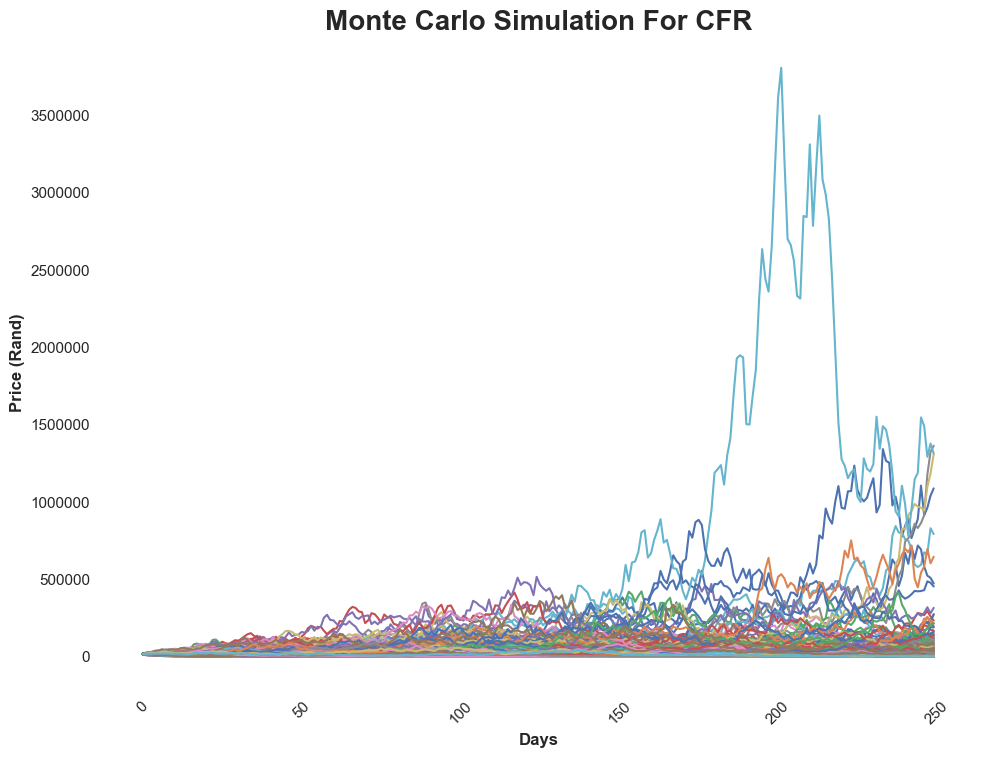

In [132]:
#Richemont monte carlo simulation
monte_simulation(price_list_cfr, 
                 'Monte Carlo Simulation For CFR')

In [133]:
#Iterating for Massmart
for t in range(1, t_intervals):
    price_list_msm[t] = price_list_msm[t-1] * daily_returns_msm[t]
    
print(price_list_msm[:3])
print('__________________________________________________________________')
print(price_list_msm[-3:])

[[6041.000000 6041.000000 6041.000000 ... 6041.000000 6041.000000
  6041.000000]
 [6081.237449 5724.053712 6134.127868 ... 5655.906374 5904.006805
  5689.090715]
 [5920.903049 5495.576756 6265.505841 ... 5710.677166 5757.508996
  5297.674951]]
__________________________________________________________________
[[7967.491177 3346.458349 4124.920092 ... 5774.533022 2263.431344
  11112.995854]
 [7959.883862 3484.484377 3896.339159 ... 5742.636935 2234.819162
  10733.593956]
 [7818.790043 3587.482860 3919.579238 ... 5487.806472 2292.923949
  10551.420664]]


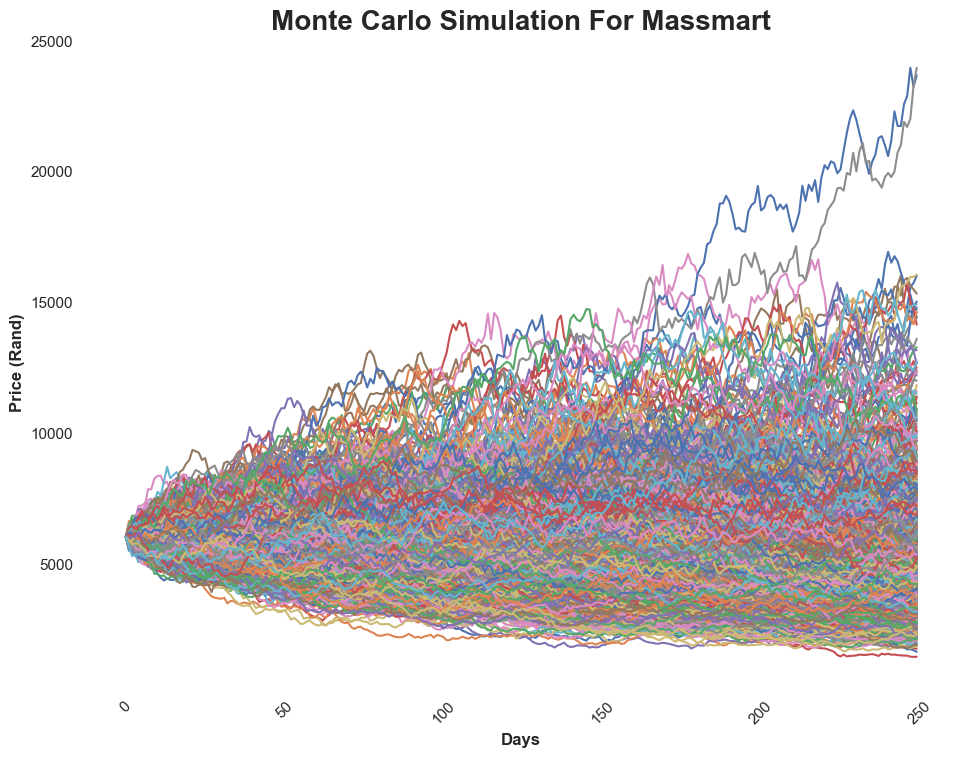

In [134]:
#Massmart monte carlo simulation
monte_simulation(price_list_msm, 
                 'Monte Carlo Simulation For Massmart')

In [135]:
#Iterating for ABSA
for t in range(1, t_intervals):
    price_list_absa[t] = price_list_absa[t-1] * daily_returns_absa[t]
 
#printing the first 3 and last 3 of the array
print(price_list_absa[:3])
print('__________________________________________________________________')
print(price_list_absa[-3:])

[[95000.000000 95000.000000 95000.000000 ... 95000.000000 95000.000000
  95000.000000]
 [96380.731356 95291.071859 95553.971799 ... 93244.785626 93294.882280
  95393.897177]
 [95666.890735 94324.023175 95711.312185 ... 93618.371176 94939.315458
  94039.282209]]
__________________________________________________________________
[[97753.072549 93169.528772 78398.809363 ... 77013.845667 107964.285021
  99645.951650]
 [97025.042698 93122.109323 79173.448838 ... 76519.736029 107865.081177
  99355.464778]
 [96915.745917 94183.365499 80561.782729 ... 77737.413331 107650.651962
  98907.076839]]


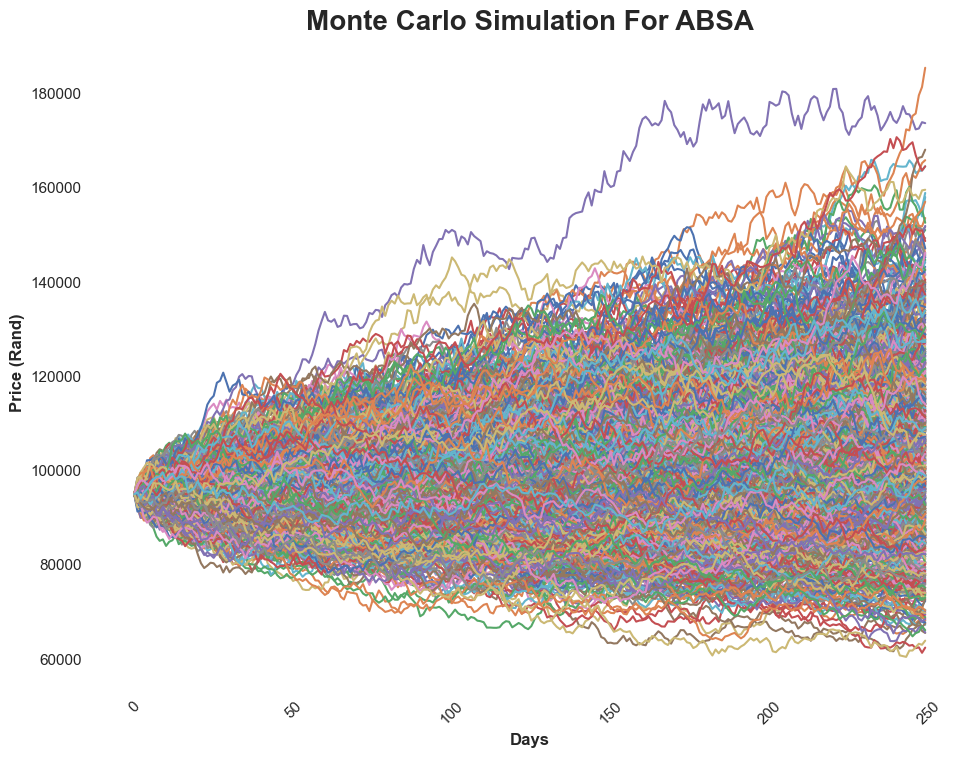

In [136]:
#ABSA monte carlo simulation
monte_simulation(price_list_absa,
                 'Monte Carlo Simulation For ABSA')

In [137]:
#Iterating for Anglo America
for t in range(1, t_intervals):
    price_list_agl[t] = price_list_agl[t-1] * daily_returns_agl[t]
    
print(price_list_agl[:3])
print('__________________________________________________________________')
print(price_list_agl[-3:])

[[57702.000000 57702.000000 57702.000000 ... 57702.000000 57702.000000
  57702.000000]
 [60162.028982 58730.302426 58710.414081 ... 59984.560812 57451.762755
  58188.146825]
 [61651.359499 58466.364252 60361.280076 ... 62386.103413 57512.061050
  54906.905173]]
__________________________________________________________________
[[95513.718315 81262.181091 54897.699525 ... 46138.221874 53862.749748
  43137.547720]
 [94834.265773 77901.035999 55009.709708 ... 47088.642951 52842.785273
  44129.367284]
 [96858.672428 77163.215986 57703.824401 ... 47149.049670 54976.743034
  44714.432864]]


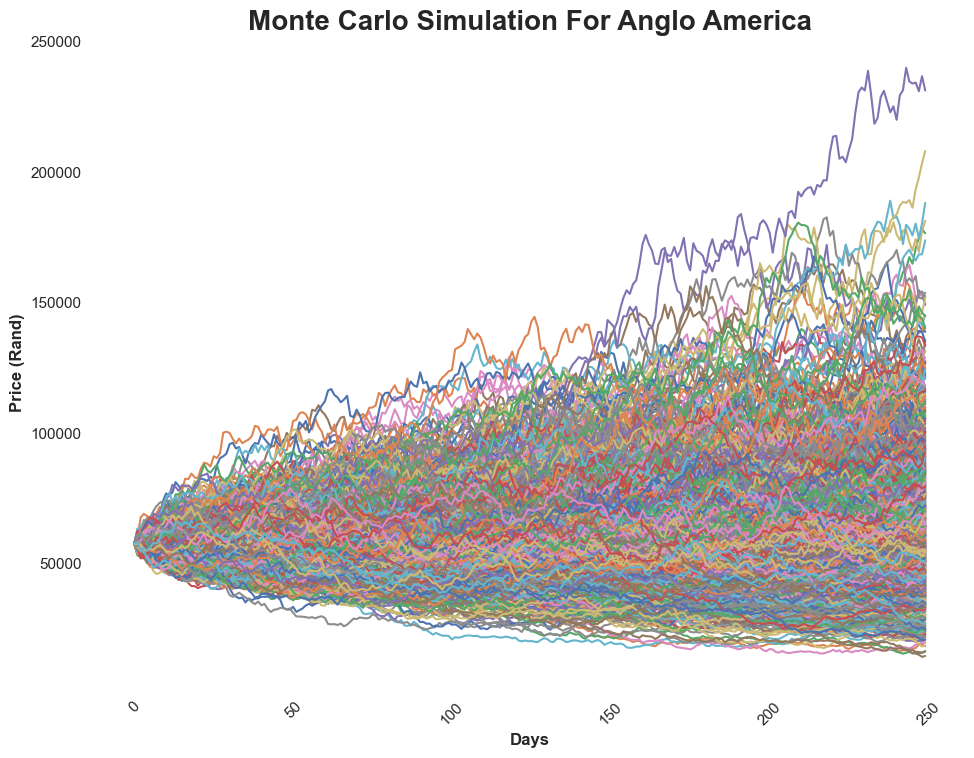

In [138]:
#Anglo America monte carlo simulation
monte_simulation(price_list_agl, 
                 'Monte Carlo Simulation For Anglo America')

# Averaging the prices

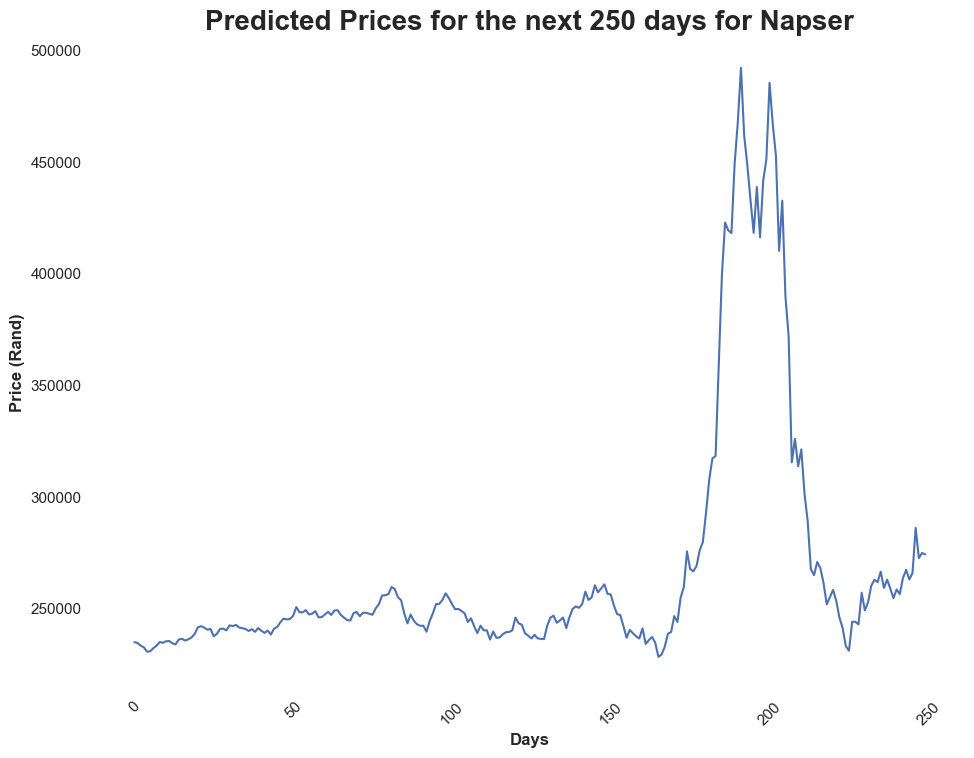

In [139]:
#Nasper predicted prices for the next 250 days
nasper_avg = price_list_npn.mean(axis = 1)
monte_simulation(nasper_avg, 
                 'Predicted Prices for the next 250 days for Napser')

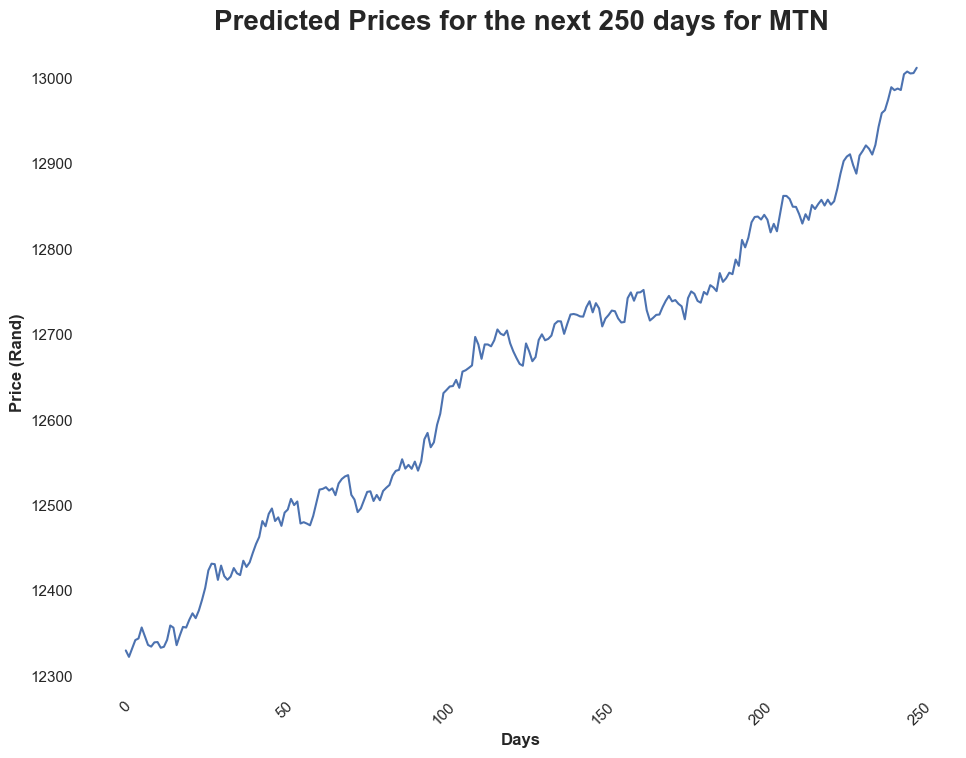

In [140]:
#MTN predicted prices for the next 250 days
MTN_avg = price_list_mtn.mean(axis = 1)
monte_simulation(MTN_avg, 
                 'Predicted Prices for the next 250 days for MTN')

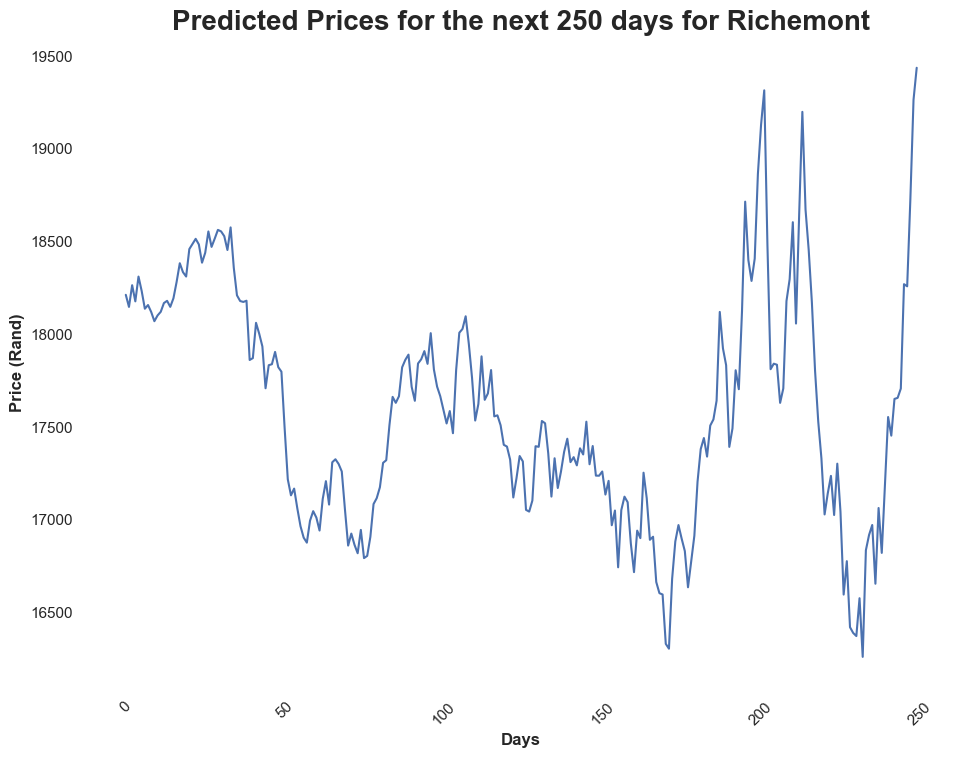

In [141]:
#Richemont predicted prices for the next 250 days
Richemont_avg = price_list_cfr.mean(axis = 1)
monte_simulation(Richemont_avg, 
                 'Predicted Prices for the next 250 days for Richemont')

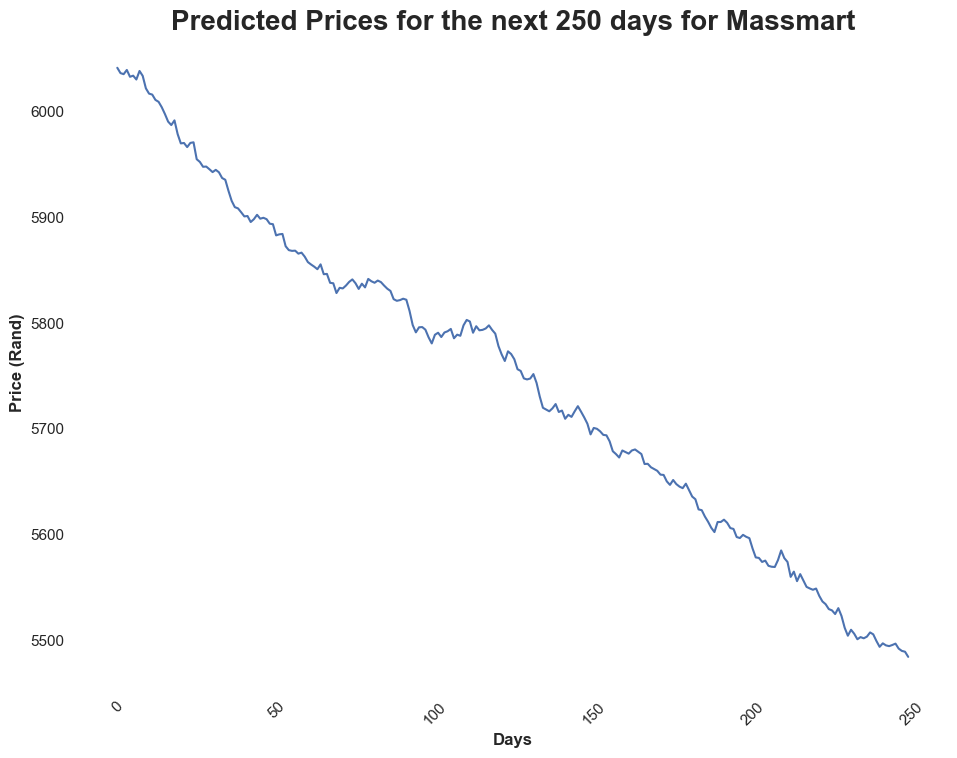

In [142]:
#Massmart predicted prices for the next 250 days
Massmart_avg = price_list_msm.mean(axis = 1)
monte_simulation(Massmart_avg, 
                 'Predicted Prices for the next 250 days for Massmart')

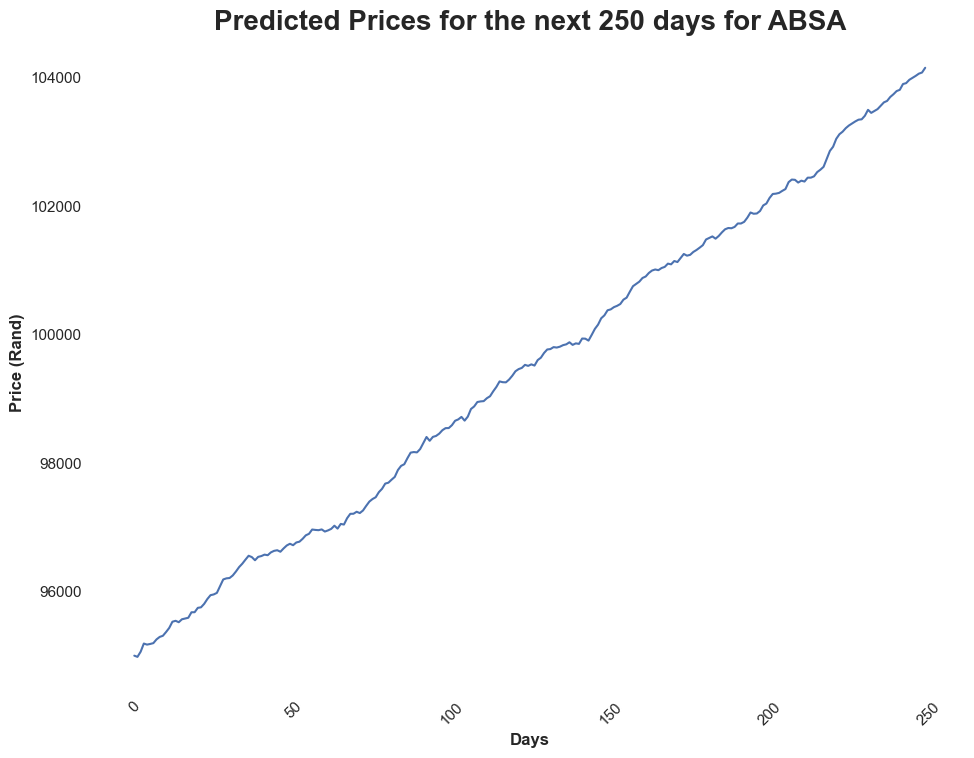

In [143]:
#ABSA predicted prices for the next 250 days
ABSA_avg = price_list_absa.mean(axis = 1)
monte_simulation(ABSA_avg, 
                 'Predicted Prices for the next 250 days for ABSA')

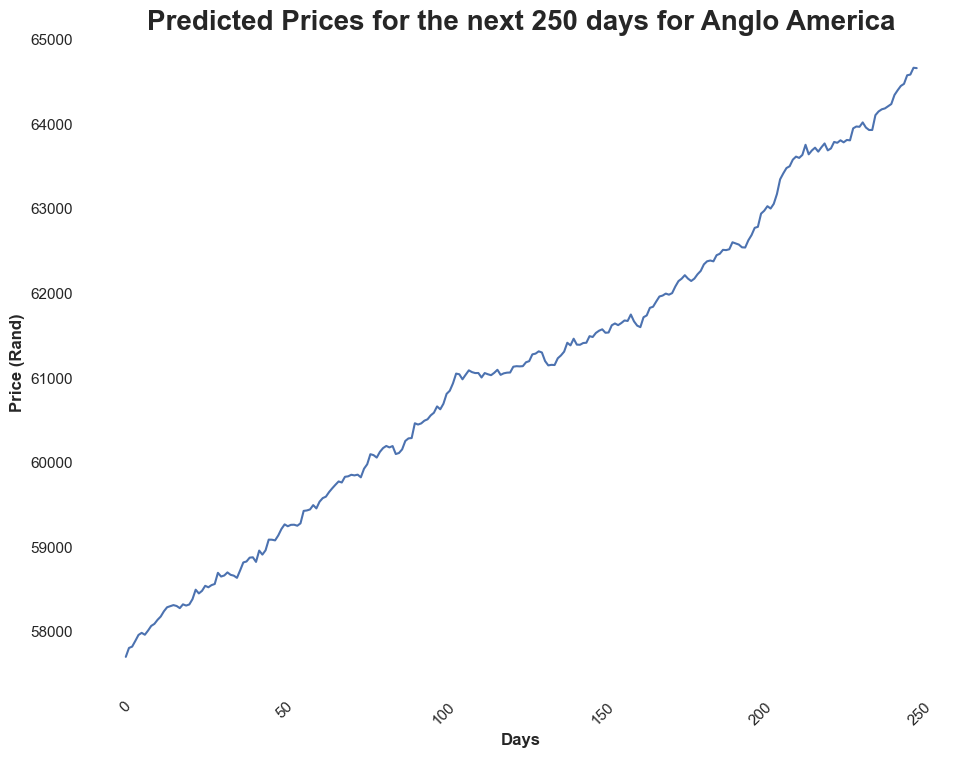

In [144]:
#Anglo America predicted prices for the next 250 days
AngloAmerica_avg = price_list_agl.mean(axis = 1)
monte_simulation(AngloAmerica_avg, 
                 'Predicted Prices for the next 250 days for Anglo America')